In [1]:
import pm4py
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import os

In [2]:
synth_dir = "C:\\Users\\matte\\Desktop\\plain_dataset\\data_before_split\\graphs\\logs\\"
# synth_dir = "C:\\Users\\matte\\Desktop\\thesis_data-master\\thesis_data-master\\process_trees_medium_ws2\\logs\\"

real_dir = "C:\\Users\\matte\\Desktop\\complete_dataset\\real\\"
folders = os.listdir(real_dir)

In [3]:
def get_traces_as_lists(log):
    traces = []
    for trace in log:
        activities = []
        for event in trace:
            activities.append(event["concept:name"])
        traces.append(activities)
    return traces

In [4]:
def traces_as_strings(traces):
    string_traces = []
    for trace in traces:
        string_traces.append(''.join(trace))
    return string_traces

In [5]:
def count_activities(log):
    traces = get_traces_as_lists(log)
    activities = set()
    for trace in traces:
        for activity in trace:
            activities.add(activity)
    return len(activities)

# Frequency analysis

In [6]:
def count_variants(log):
    traces = traces_as_strings(get_traces_as_lists(log))
    freq = {}
    for trace in traces:
        freq[trace] = freq.get(trace, 0) + 1
    return freq

In [7]:
def get_frequency_data(log):
    freq_dict = count_variants(log)
    freq_dict_sorted = {k: v for k, v in sorted(freq_dict.items(), key=lambda item: item[1], reverse=True)}
    mapping = {k:i+1 for i, k in enumerate(freq_dict_sorted.keys())}
    y = np.array([frequency for frequency in freq_dict_sorted.values()])
    x = np.array([i for i in mapping.values()])
    assert x.size == y.size
    return x, y, mapping

In [8]:
def behavior(log):
    x, y, _ = get_frequency_data(log)
    z = [f/sum(y) for f in y]

    threshold = 0
    for i in range(len(z)):
        if sum(z[:i]) < 0.8:
            threshold = i

    main_behavior = x[:threshold]
    dev_behavior = x[threshold:]

    return main_behavior, dev_behavior

In [9]:
import powerlaw

# Alpha relations analysis

In [10]:
def get_alpha_relations(log):
    traces = get_traces_as_lists(log)

    direct_succession = set()
    causality = set()
    parallel = set()

    for trace in traces:
        for i in range(len(trace)-1):
            direct_succession.add((trace[i], trace[i+1]))
    
    causality_func = lambda x, y: (x,y) in direct_succession and (y,x) not in direct_succession
    parallel_func = lambda x, y: (x,y) in direct_succession and (y,x) in direct_succession

    for trace in traces:
        for i in range(len(trace)-1):
            x, y = trace[i], trace[i+1]
            if causality_func(x, y):
                causality.add((x, y))
            elif parallel_func(x, y):
                parallel.add((x, y))

    unrelated = direct_succession.difference(causality.union(parallel))

    return {
        "direct_succession": direct_succession,
        "causality": causality,
        "parallel": parallel,
        "urelated": unrelated
        }

# Everything

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

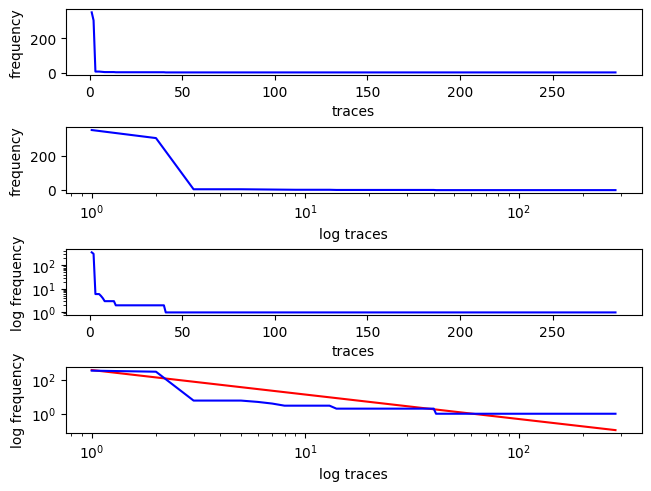

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

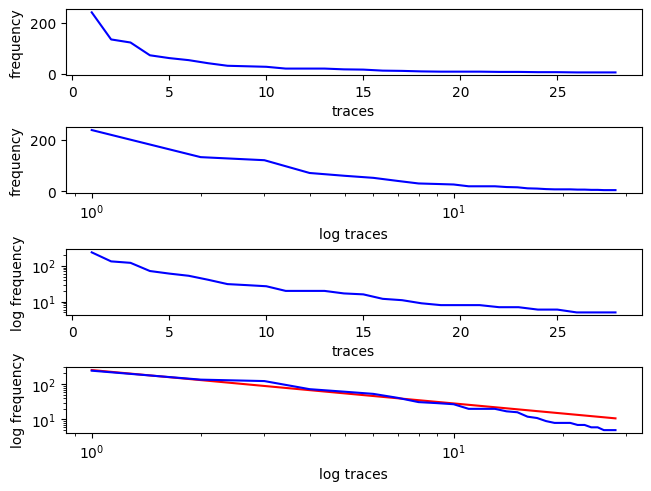

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

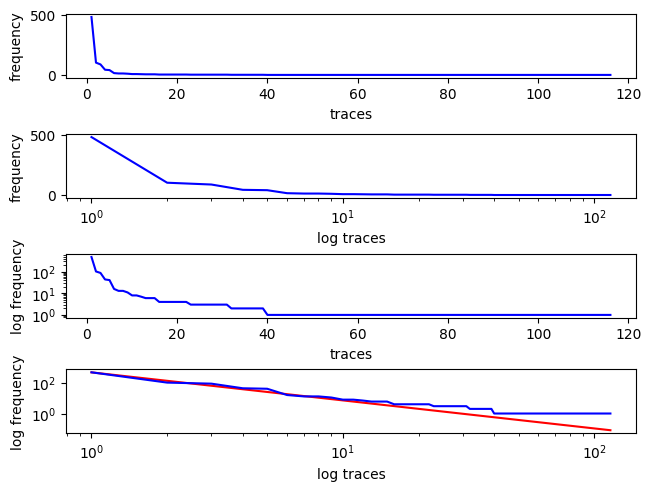

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

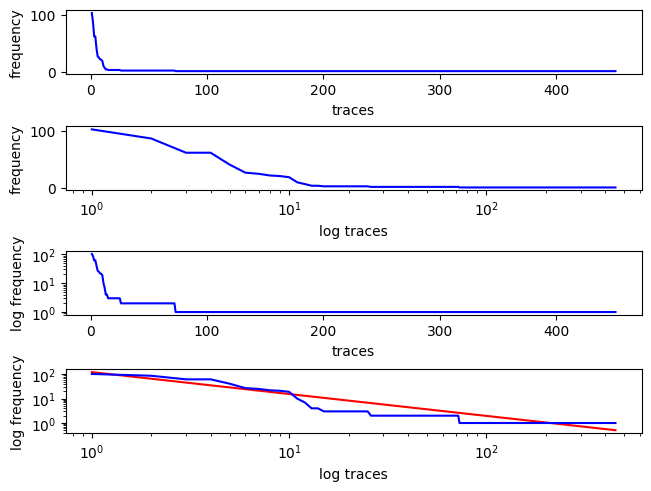

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

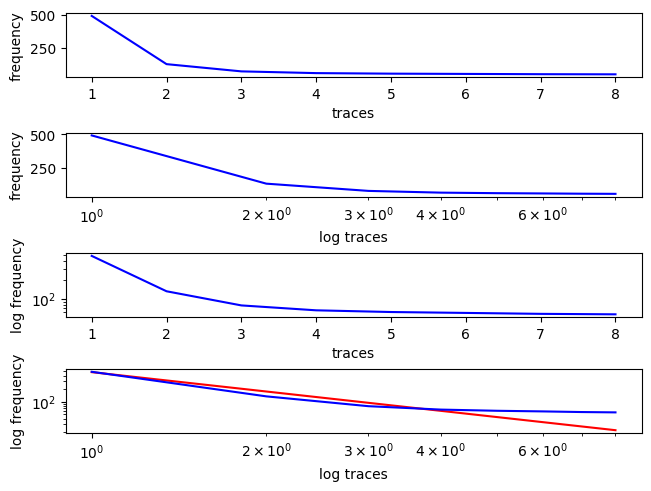

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

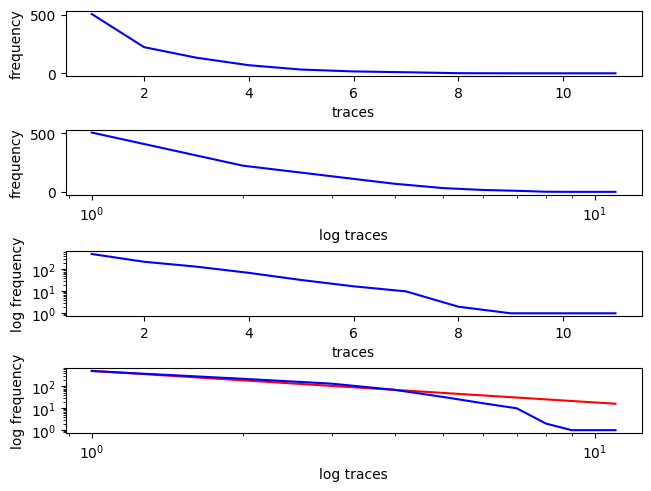

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

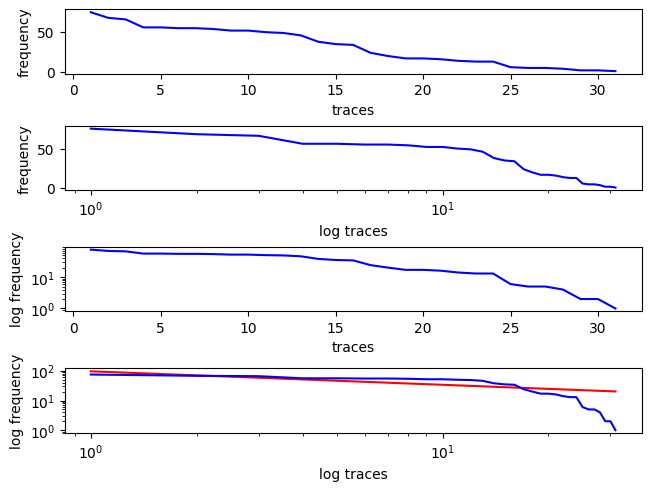

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

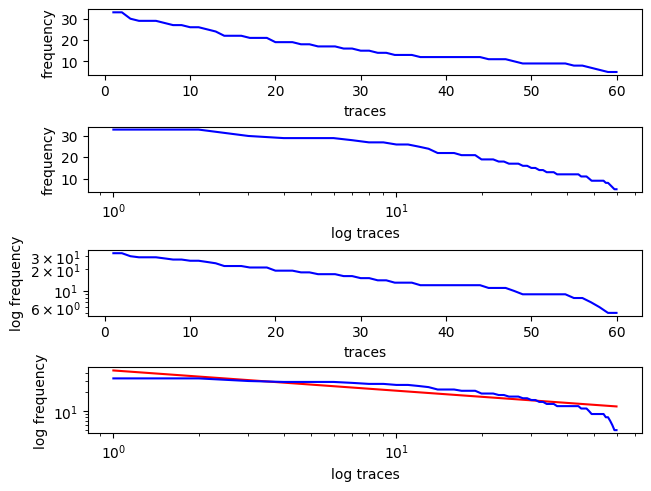

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

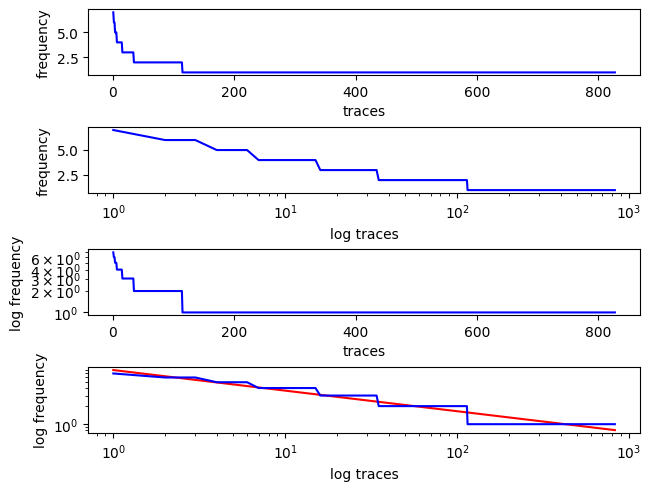

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

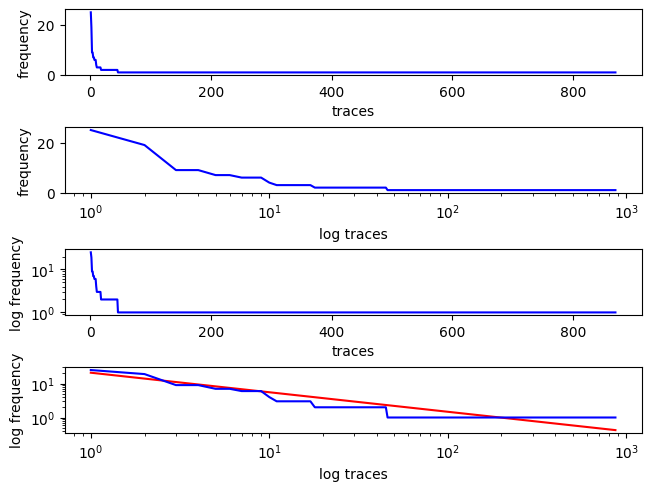

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

c:\Users\matte\anaconda3\envs\tesi\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


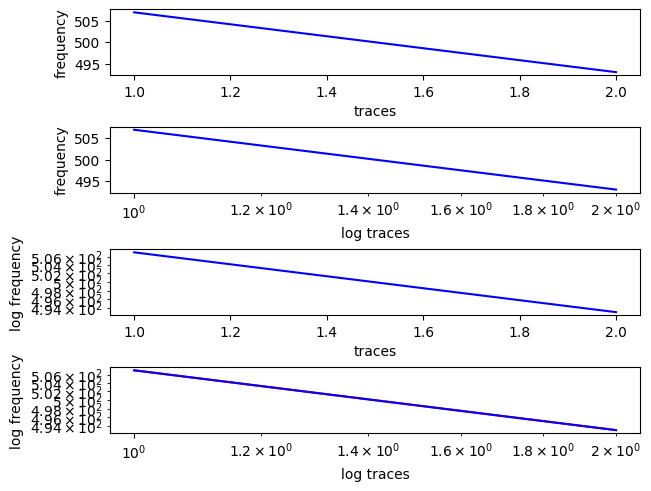

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

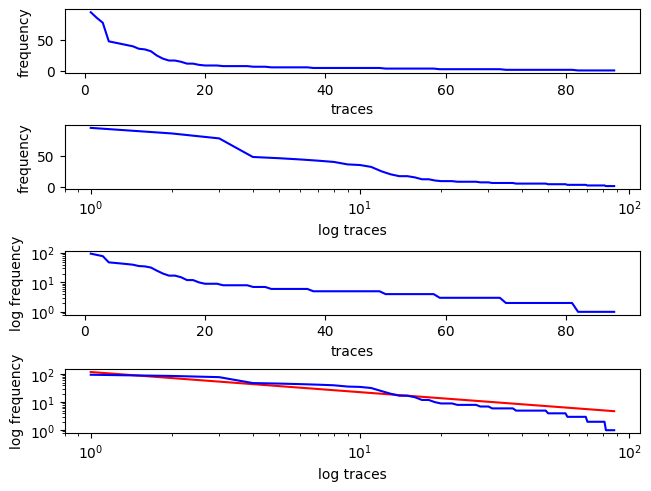

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

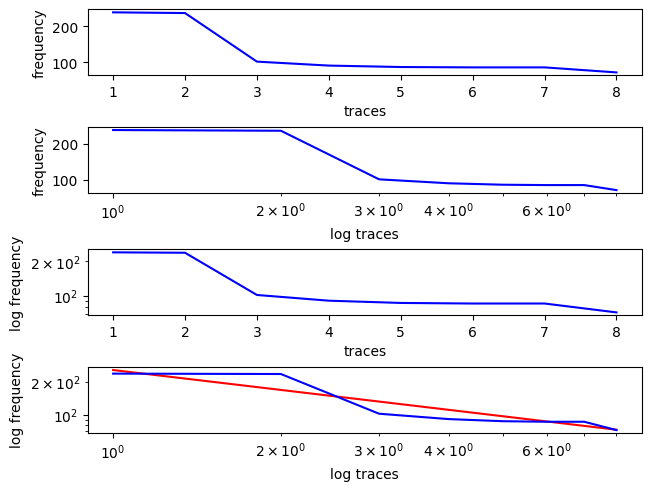

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

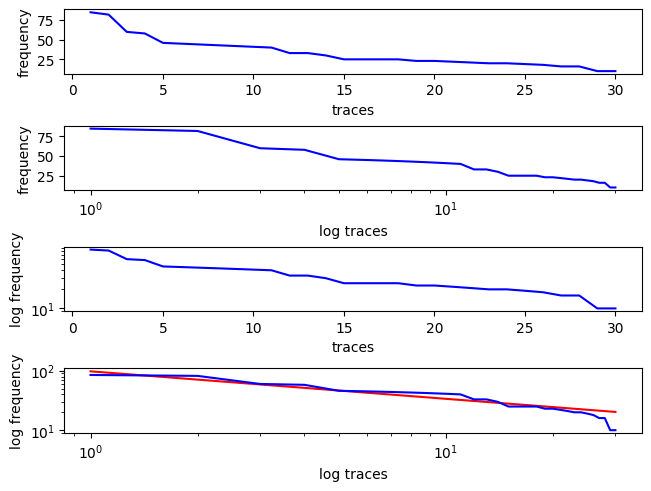

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

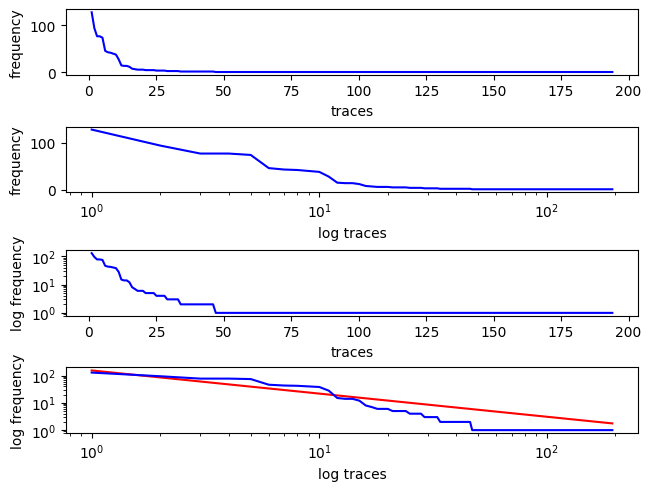

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

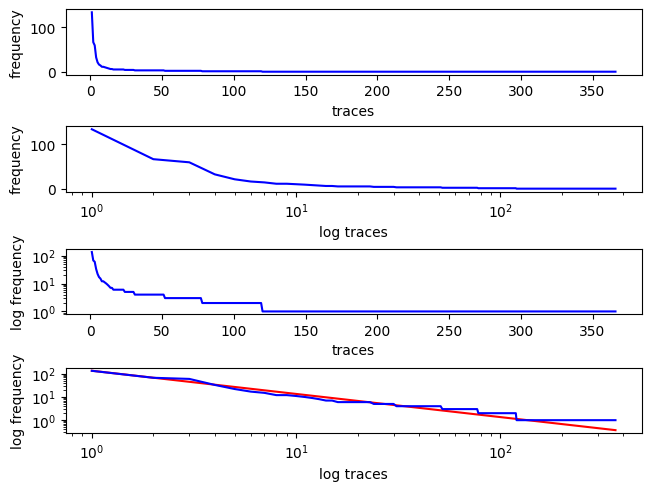

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

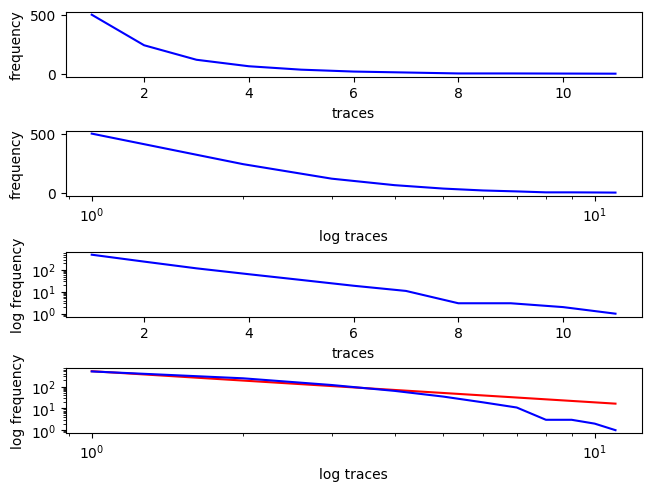

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

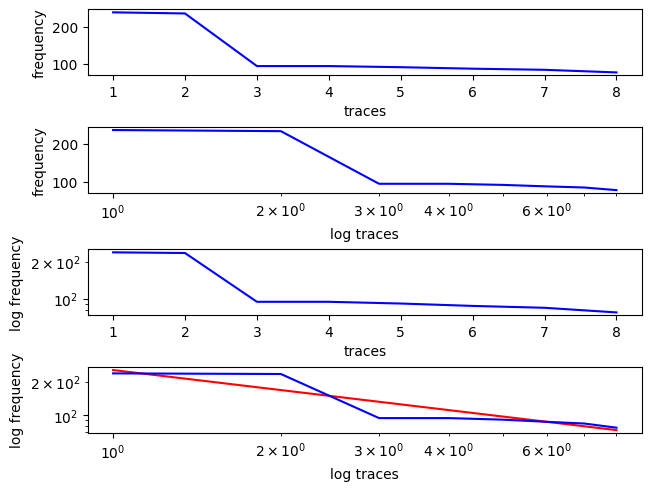

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

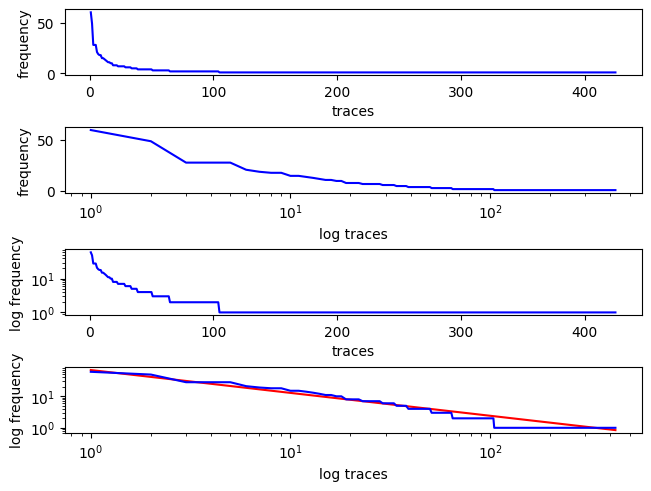

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

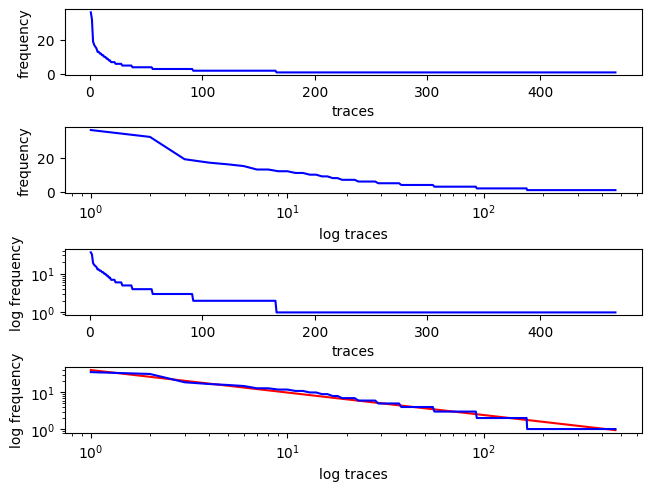

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

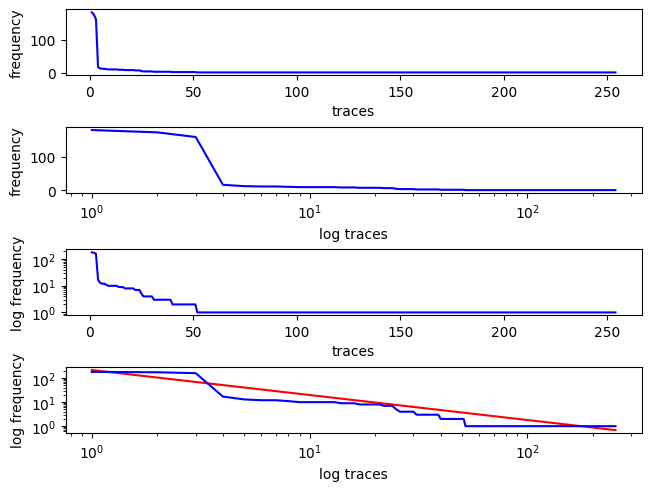

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

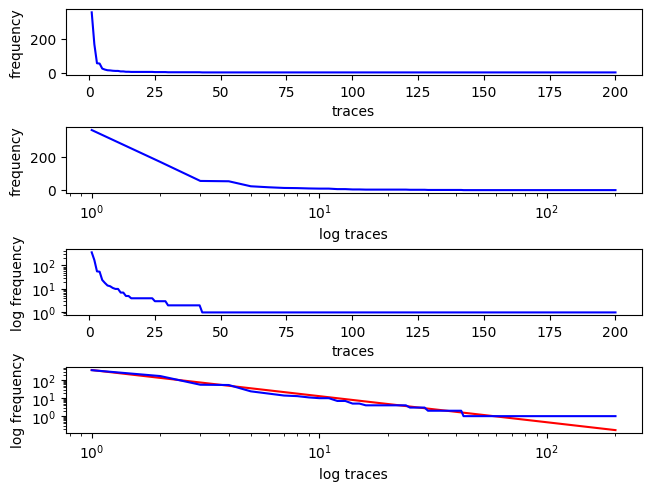

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

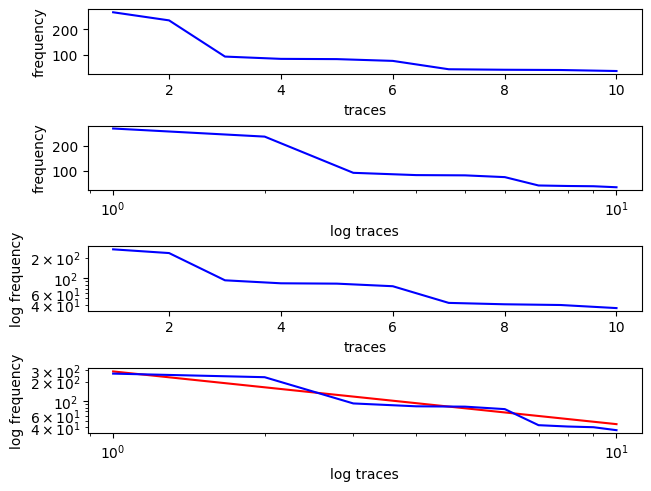

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

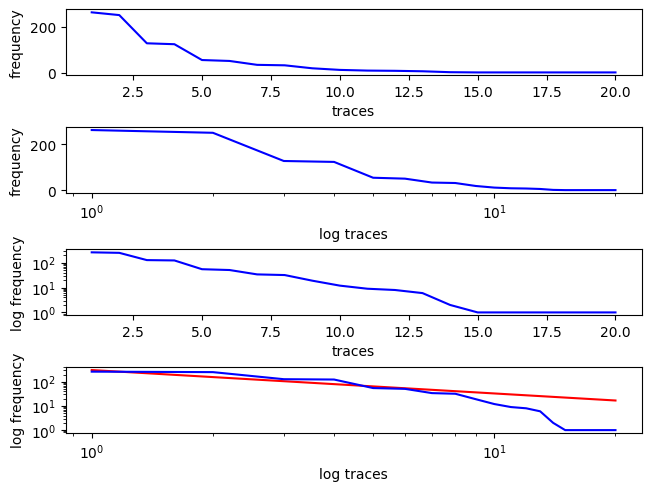

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

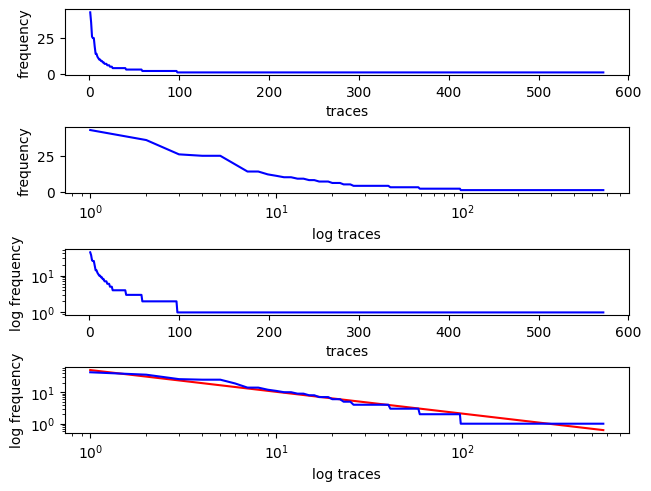

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

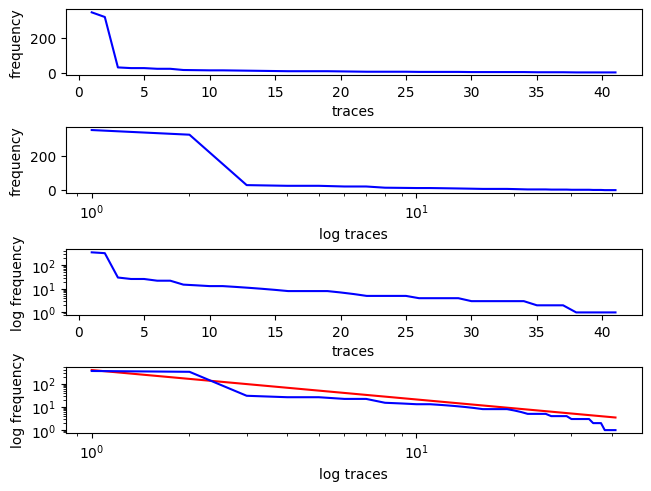

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

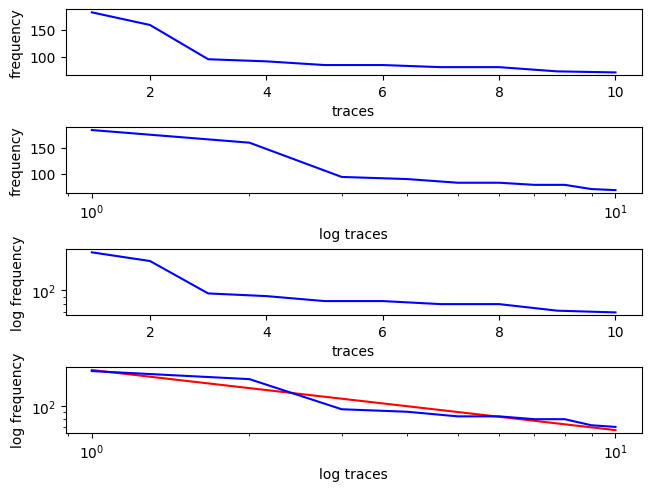

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

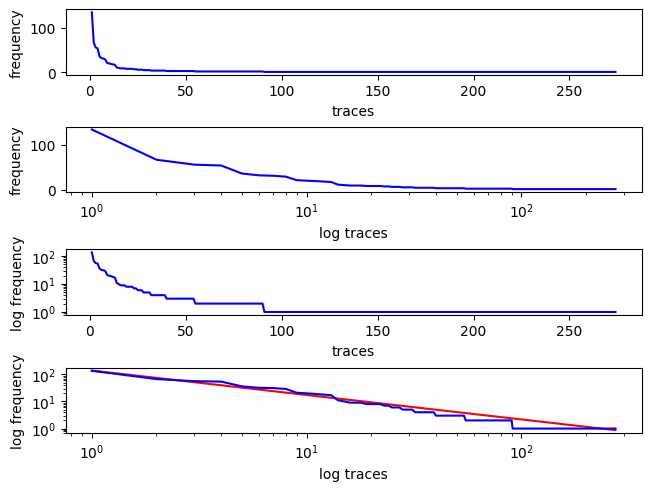

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

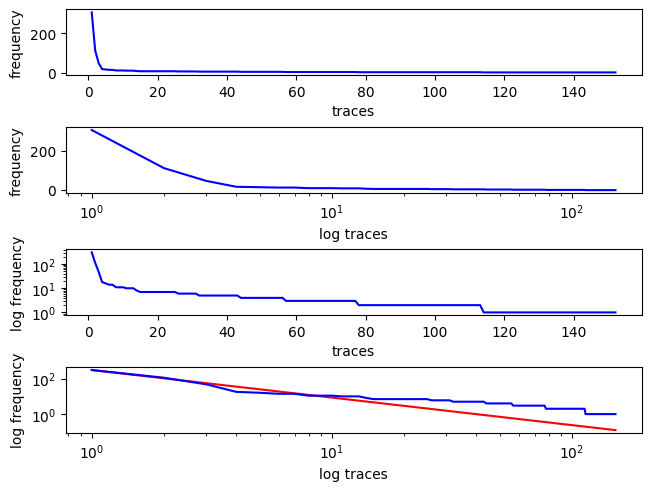

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

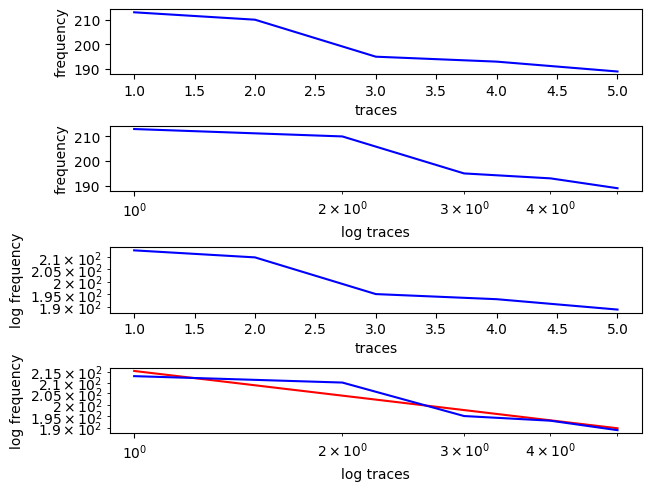

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

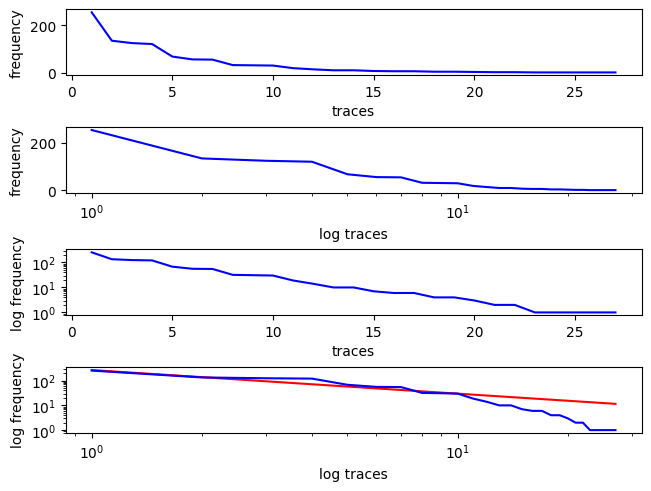

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

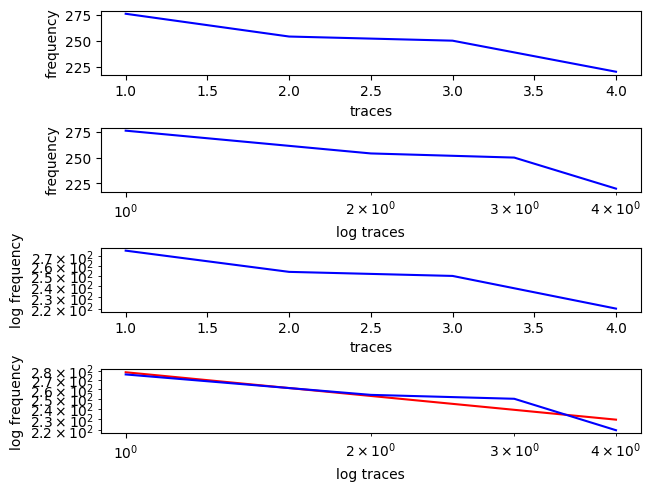

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

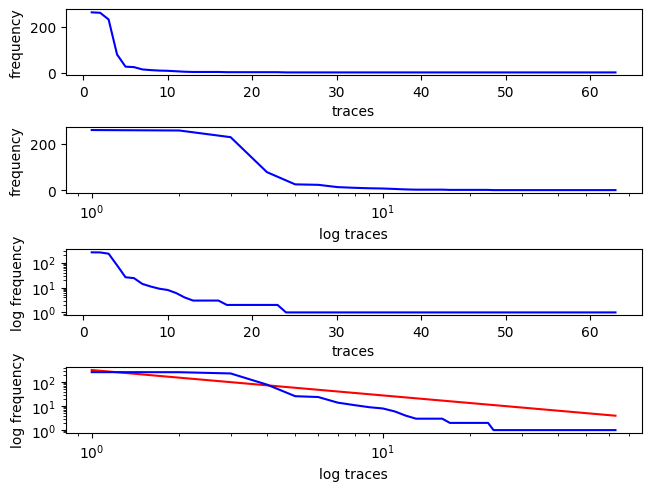

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

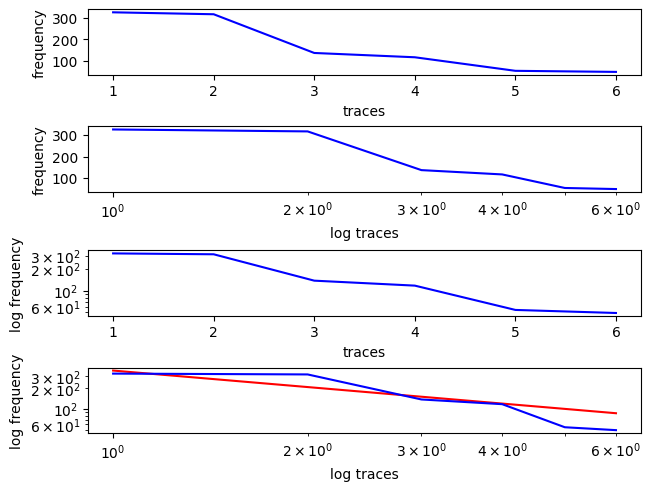

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

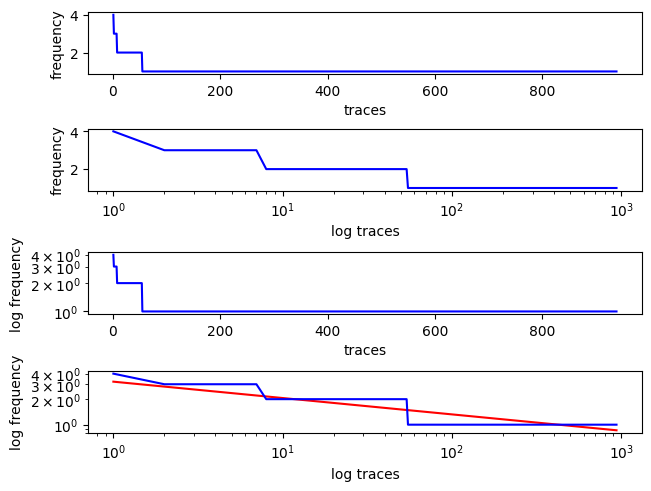

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

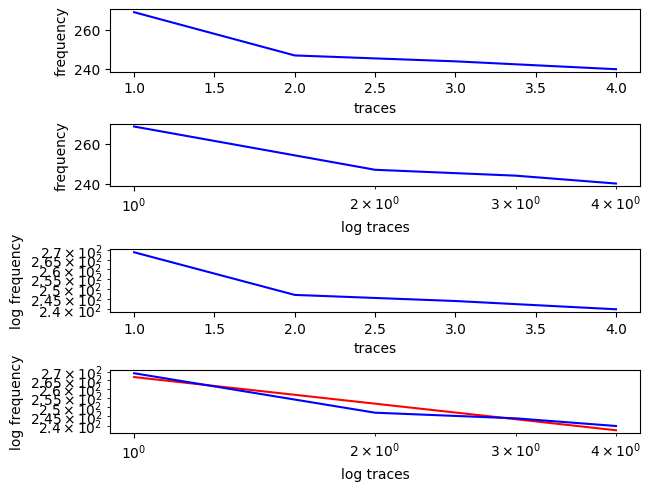

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

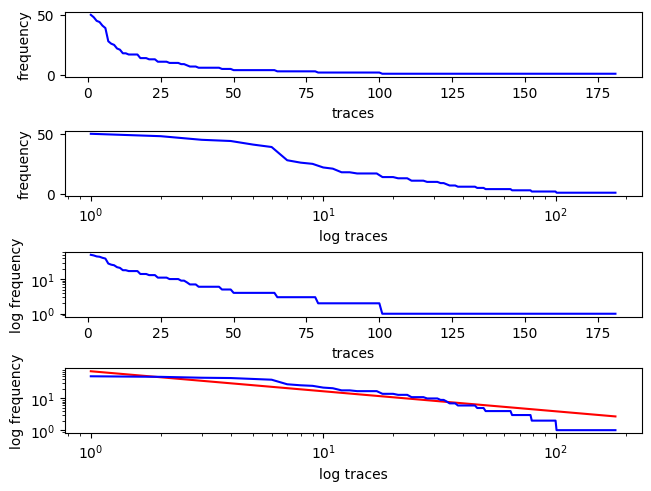

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

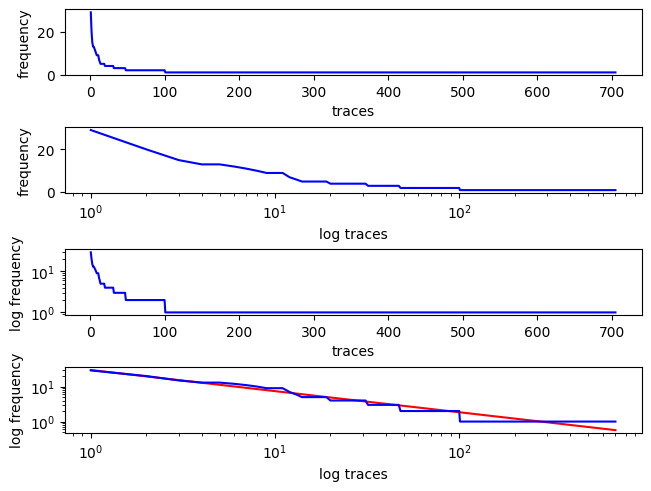

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

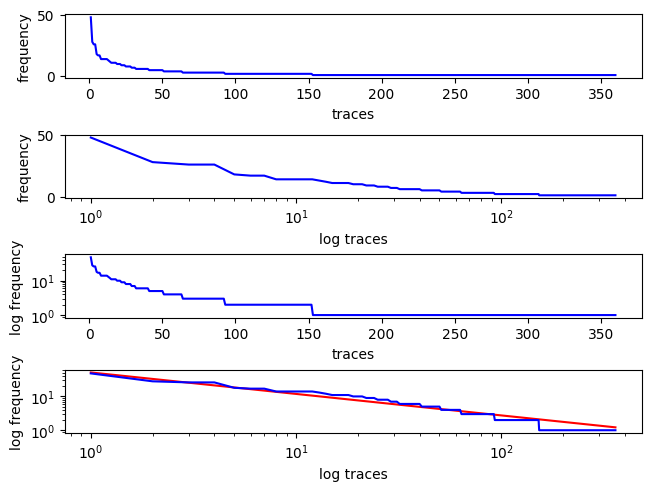

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

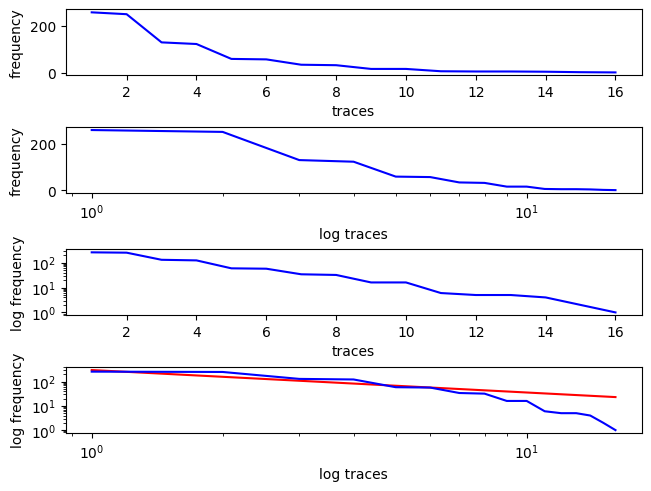

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

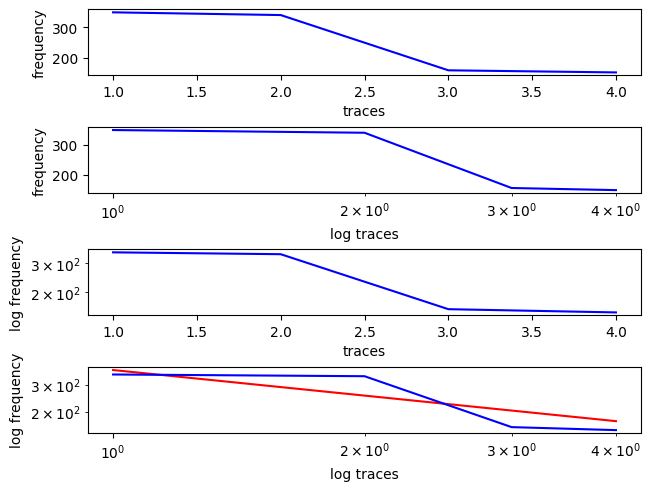

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

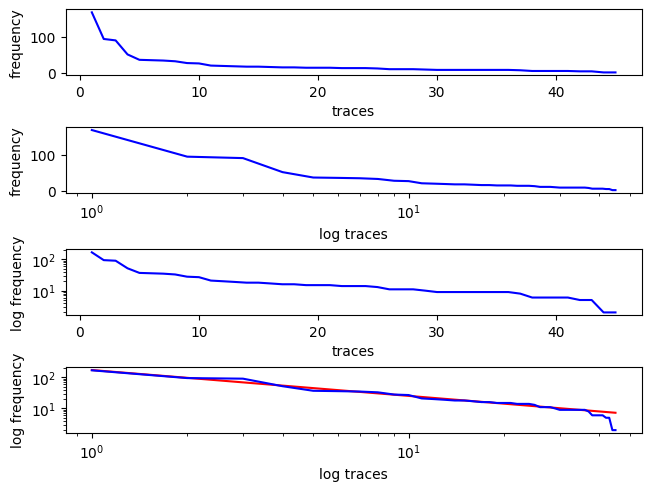

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

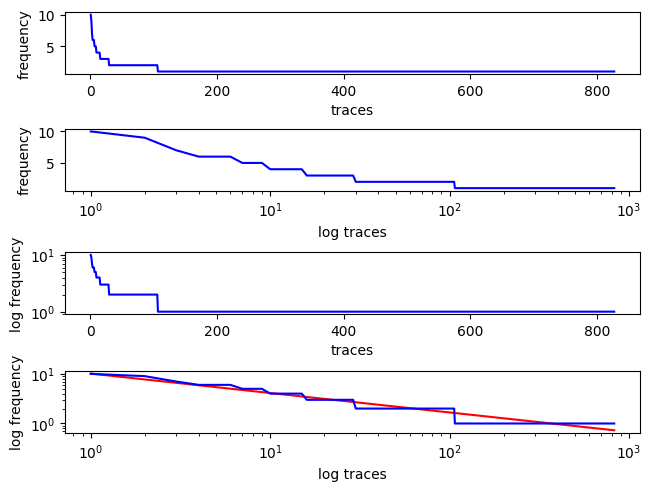

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

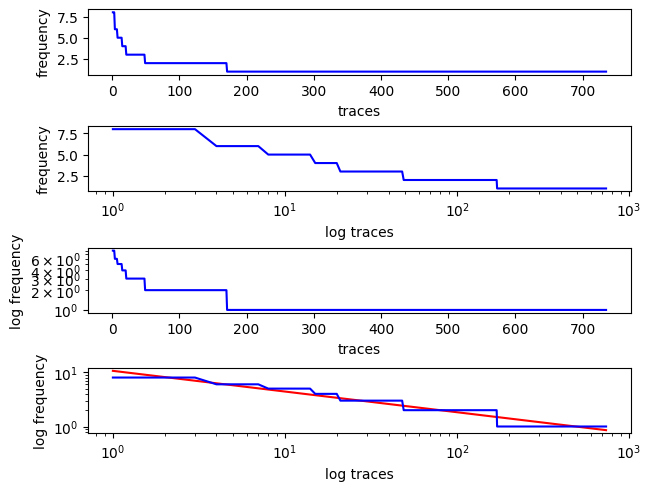

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

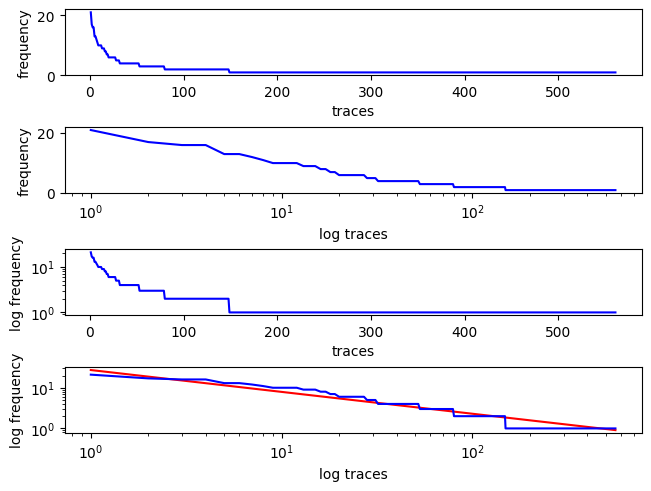

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

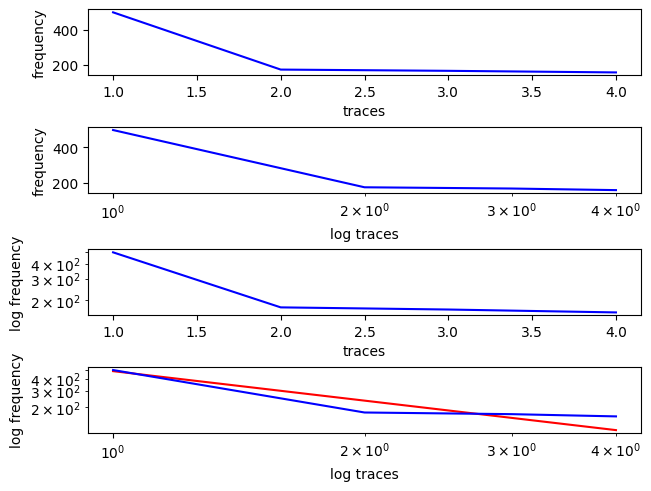

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

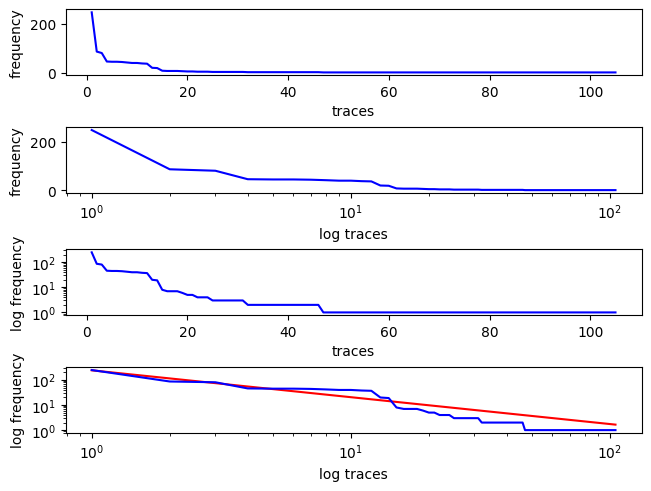

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

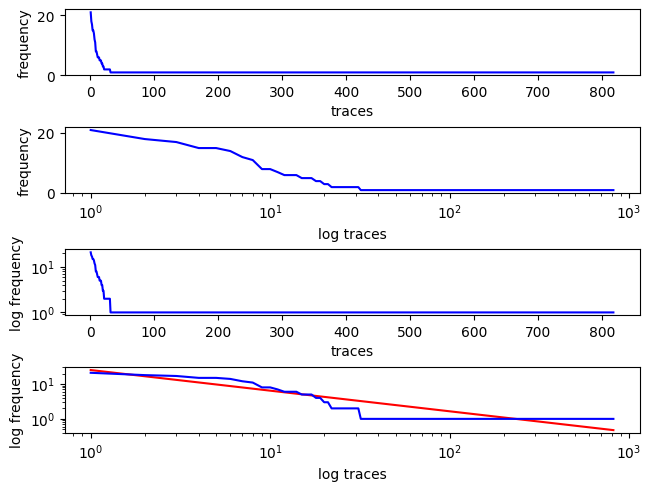

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

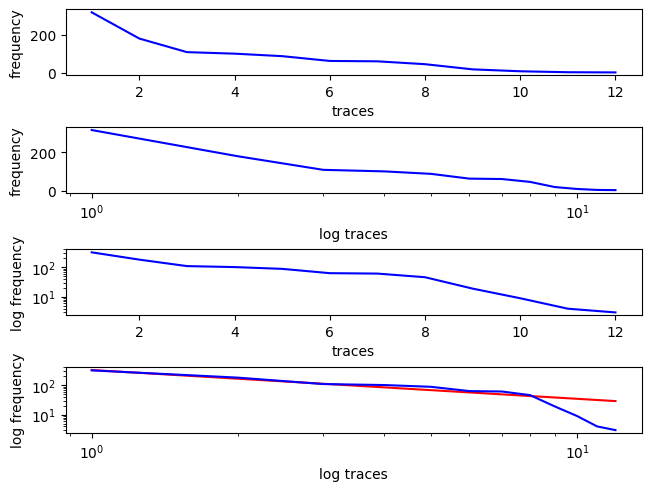

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

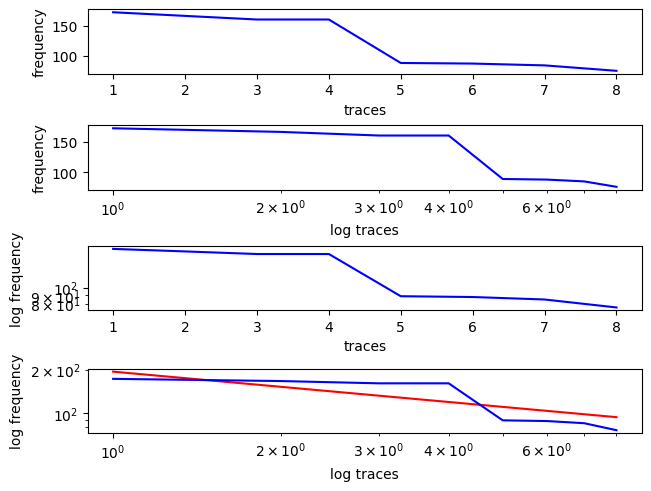

parsing log, completed traces ::   0%|          | 0/1000 [00:00<?, ?it/s]

In [11]:
# %%capture

synth_rmses = []
synth_alphas = []
synth_behavior_ratio = []
synth_no_variants = []
synth_causality = []
synth_parallel = []

for i, file in enumerate([file for file in os.listdir(synth_dir) if "xes" in file]):
    log = pm4py.read_xes(os.path.join(synth_dir, file))
    x, y, _ = get_frequency_data(log)
    if x.size < 2 and y.size < 2:
        continue

    synth_no_variants.append(x.size)

    func = lambda x, C, a: C*x**(-a)
    popt, pcov = curve_fit(func, x, y, maxfev=5000)
    yhat = func(x, *popt)

    alpha = popt[1]
    synth_alphas.append(alpha)

    rmse = np.sqrt(np.mean(np.square(yhat-y)))
    synth_rmses.append(rmse)

    main_behavior, dev_behavior = behavior(log)
    synth_behavior_ratio.append(len(main_behavior)/(len(dev_behavior)+len(main_behavior)))

    if i < 50:
        figure, axis = plt.subplots(4, constrained_layout=True)
        axis[0].plot(x, y, c="b")
        axis[0].set_ylabel("frequency")
        axis[0].set_xlabel("traces")

        axis[1].semilogx(x, y, c="b")
        axis[1].set_ylabel("frequency")
        axis[1].set_xlabel("log traces")

        axis[2].semilogy(x, y, c="b")
        axis[2].set_ylabel("log frequency")
        axis[2].set_xlabel("traces")

        axis[3].loglog(x, yhat, c="r")
        axis[3].loglog(x, y, c="b")
        axis[3].set_ylabel("log frequency")
        axis[3].set_xlabel("log traces")
        plt.show()
    else:
        break

    alpha_relations = get_alpha_relations(log)
    causality = alpha_relations["causality"]
    parallel = alpha_relations["parallel"]

    traces = get_traces_as_lists(log)

    causality_count = 0
    parallel_count = 0

    for trace in traces:
        for i in range(len(trace)-1):
            x, y = trace[i], trace[i+1]
            causality_count += int((x,y) in causality)
            parallel_count += int((x,y) in parallel)

    causality_count /= len(traces)
    parallel_count /= len(traces)
    
    synth_causality.append(causality_count)
    synth_parallel.append(parallel_count)

In [12]:
%%capture

synth_rmses = []
synth_alphas = []
synth_behavior_ratio = []
synth_no_variants = []
synth_causality = []
synth_parallel = []

for i, file in enumerate([file for file in os.listdir(synth_dir) if "xes" in file]):
    log = pm4py.read_xes(os.path.join(synth_dir, file))
    x, y, _ = get_frequency_data(log)
    if x.size < 2 and y.size < 2:
        continue

    synth_no_variants.append(x.size)

    func = lambda x, C, a: C*x**(-a)
    popt, pcov = curve_fit(func, x, y, maxfev=5000)
    yhat = func(x, *popt)

    alpha = popt[1]
    synth_alphas.append(alpha)

    rmse = np.sqrt(np.mean(np.square(yhat-y)))
    synth_rmses.append(rmse)

    main_behavior, dev_behavior = behavior(log)
    synth_behavior_ratio.append(len(main_behavior)/(len(dev_behavior)+len(main_behavior)))

    # if i < 50:
    #     figure, axis = plt.subplots(4, constrained_layout=True)
    #     axis[0].plot(x, y, c="b")
    #     axis[0].set_ylabel("frequency")
    #     axis[0].set_xlabel("traces")

    #     axis[1].semilogx(x, y, c="b")
    #     axis[1].set_ylabel("frequency")
    #     axis[1].set_xlabel("log traces")

    #     axis[2].semilogy(x, y, c="b")
    #     axis[2].set_ylabel("log frequency")
    #     axis[2].set_xlabel("traces")

    #     axis[3].loglog(x, yhat, c="r")
    #     axis[3].loglog(x, y, c="b")
    #     axis[3].set_ylabel("log frequency")
    #     axis[3].set_xlabel("log traces")
    # else:
    #     break

    alpha_relations = get_alpha_relations(log)
    causality = alpha_relations["causality"]
    parallel = alpha_relations["parallel"]

    traces = get_traces_as_lists(log)

    causality_count = 0
    parallel_count = 0

    for trace in traces:
        for i in range(len(trace)-1):
            x, y = trace[i], trace[i+1]
            causality_count += int((x,y) in causality)
            parallel_count += int((x,y) in parallel)

    causality_count /= len(traces)
    parallel_count /= len(traces)
    
    synth_causality.append(causality_count)
    synth_parallel.append(parallel_count)

BPI_2012


parsing log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

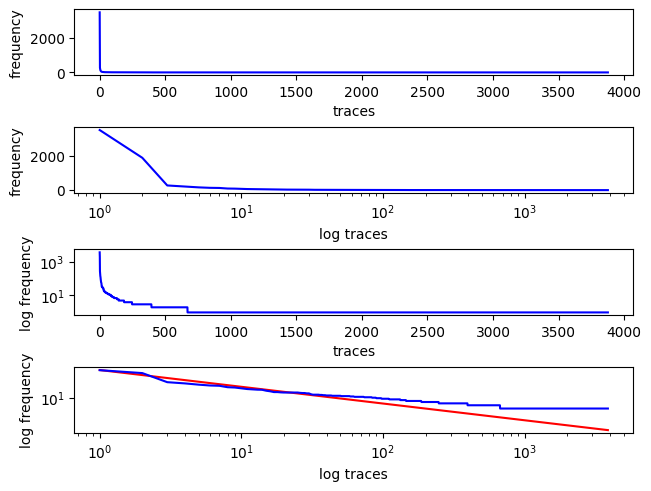

BPI_2012_A


parsing log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

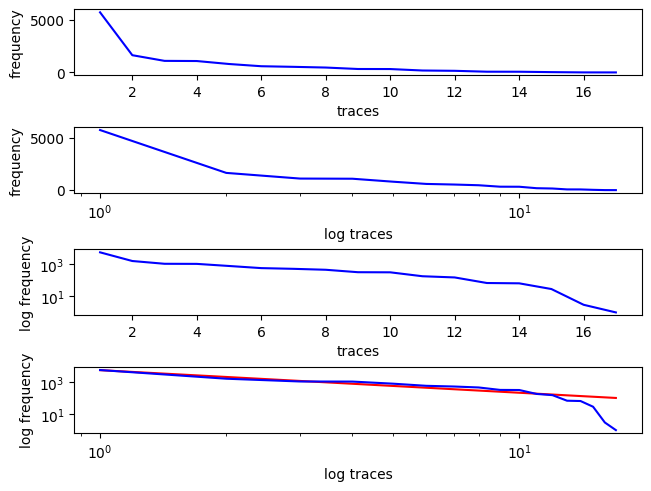

BPI_2012_O


parsing log, completed traces ::   0%|          | 0/5015 [00:00<?, ?it/s]

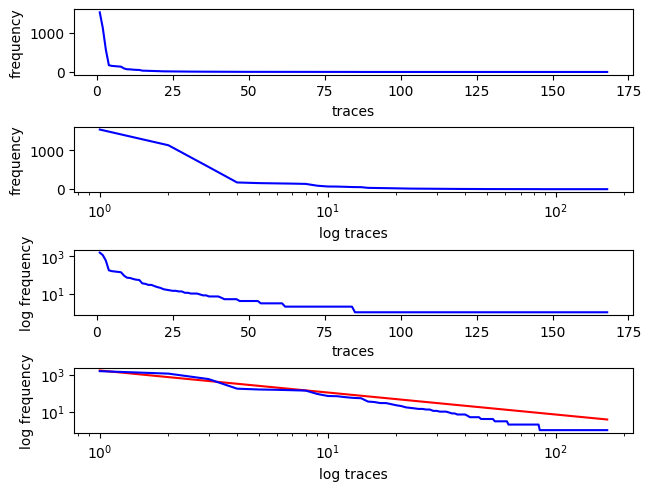

BPI_2012_W


parsing log, completed traces ::   0%|          | 0/9658 [00:00<?, ?it/s]

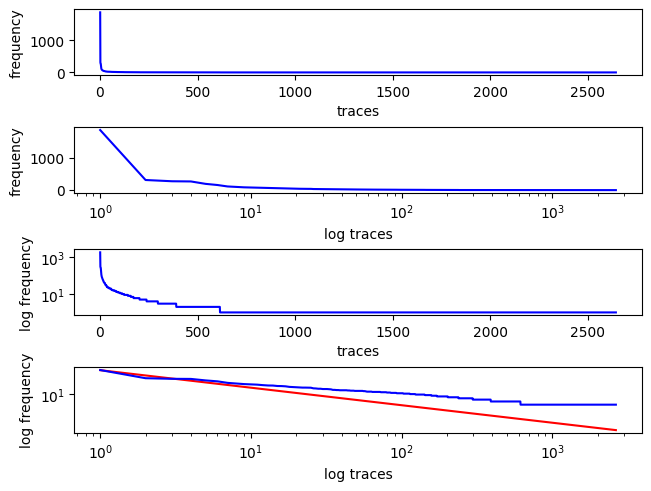

BPI_2017


parsing log, completed traces ::   0%|          | 0/31509 [00:00<?, ?it/s]

C:\Users\matte\AppData\Local\Temp\ipykernel_7320\1615735523.py:20: RuntimeWarning: overflow encountered in power
  func = lambda x, C, a: C*x**(-a)
C:\Users\matte\AppData\Local\Temp\ipykernel_7320\1615735523.py:20: RuntimeWarning: overflow encountered in multiply
  func = lambda x, C, a: C*x**(-a)


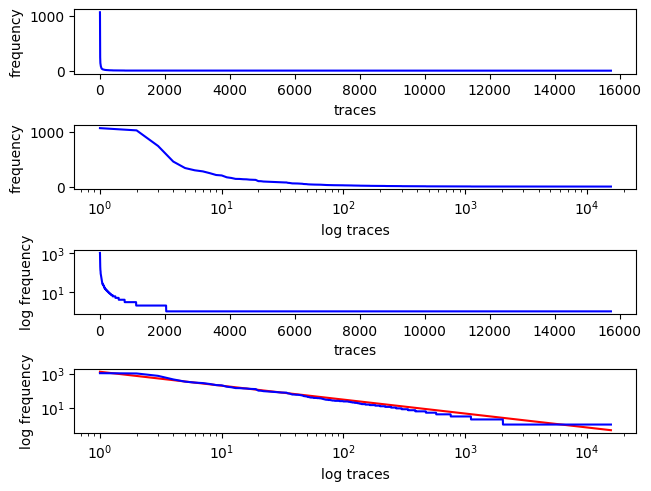

BPI_2017_A


parsing log, completed traces ::   0%|          | 0/31509 [00:00<?, ?it/s]

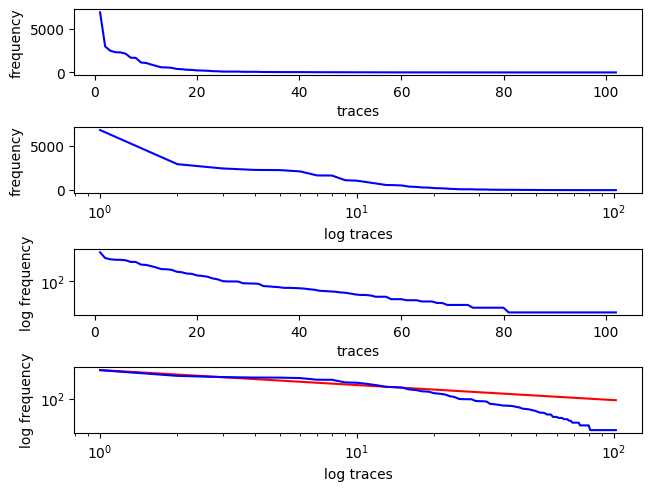

BPI_2017_O


parsing log, completed traces ::   0%|          | 0/31509 [00:00<?, ?it/s]

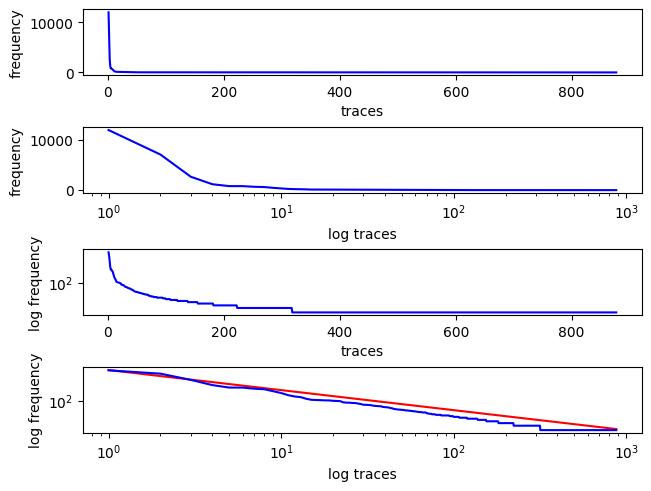

BPI_2017_W


parsing log, completed traces ::   0%|          | 0/31509 [00:00<?, ?it/s]

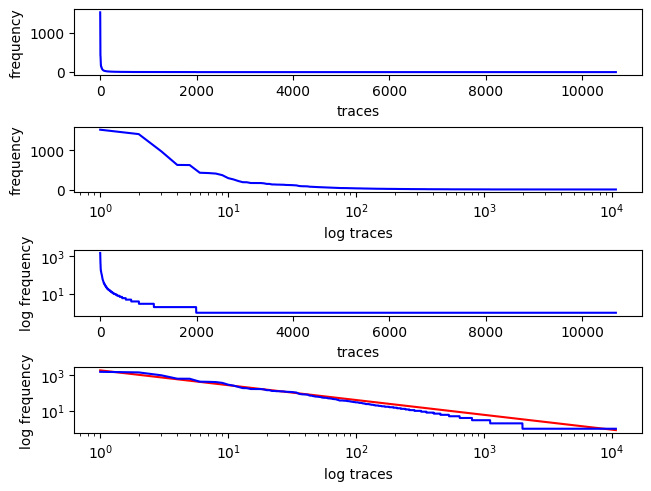

BPI_2020_Domestic_declarations


parsing log, completed traces ::   0%|          | 0/10500 [00:00<?, ?it/s]

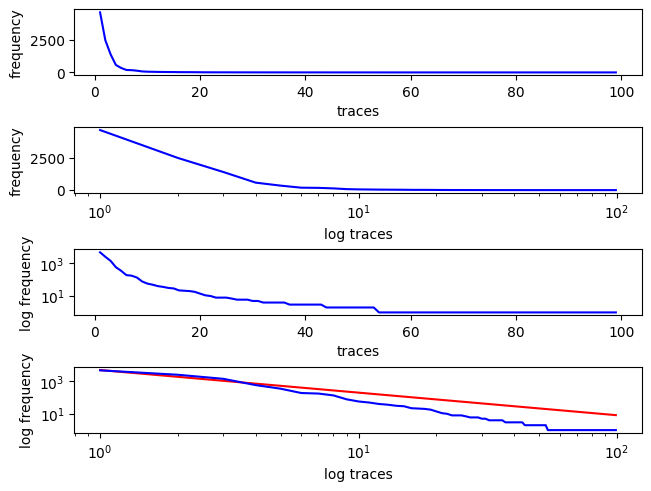

BPI_2020_International_declarations


parsing log, completed traces ::   0%|          | 0/6449 [00:00<?, ?it/s]

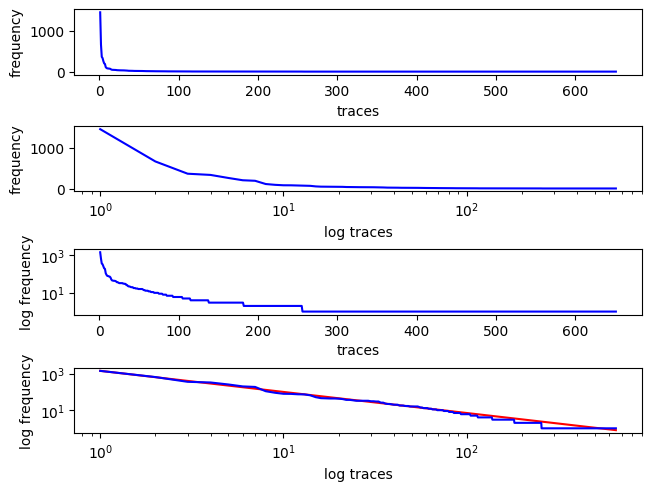

BPI_2020_Permit_log


parsing log, completed traces ::   0%|          | 0/7065 [00:00<?, ?it/s]

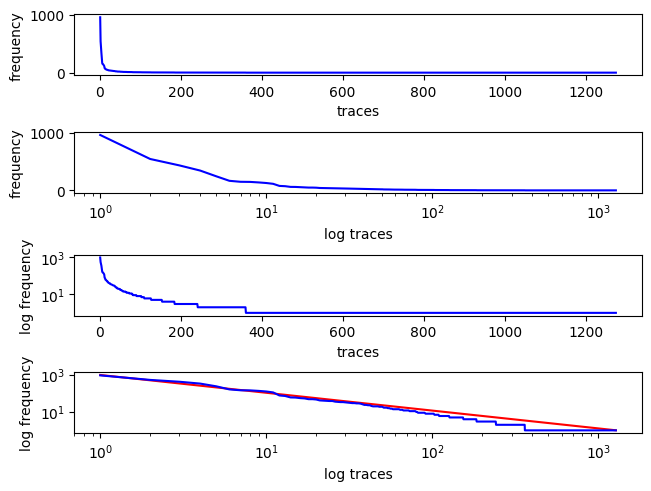

BPI_2020_Prepaid_travel_cost


parsing log, completed traces ::   0%|          | 0/2092 [00:00<?, ?it/s]

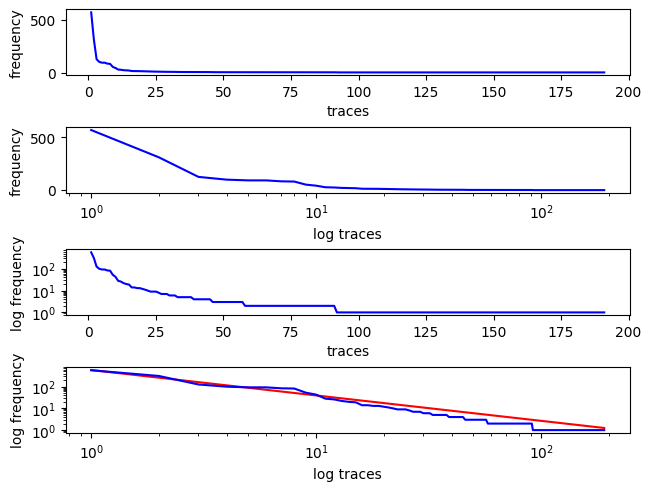

BPI_2020_Request_for_payment


parsing log, completed traces ::   0%|          | 0/6886 [00:00<?, ?it/s]

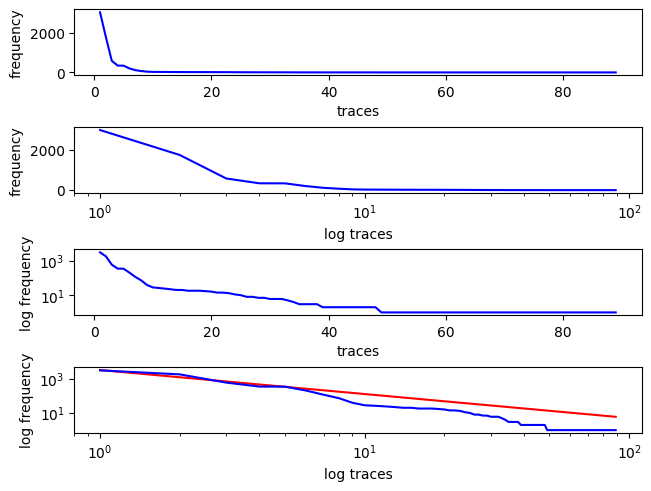

Hospital_Billing


parsing log, completed traces ::   0%|          | 0/100000 [00:00<?, ?it/s]

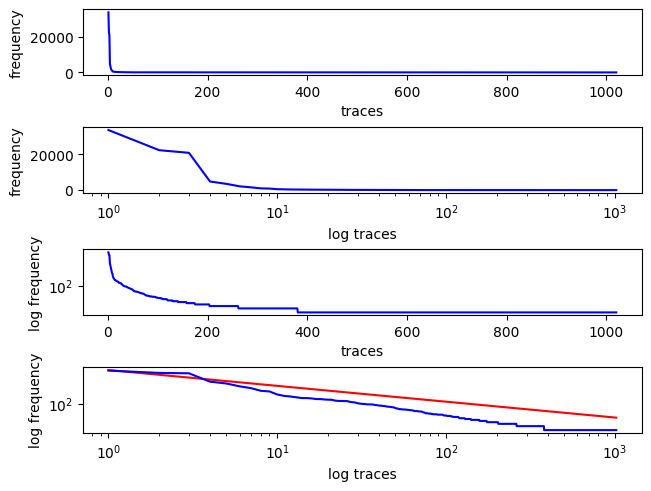

road_traffic_fine


parsing log, completed traces ::   0%|          | 0/150370 [00:00<?, ?it/s]

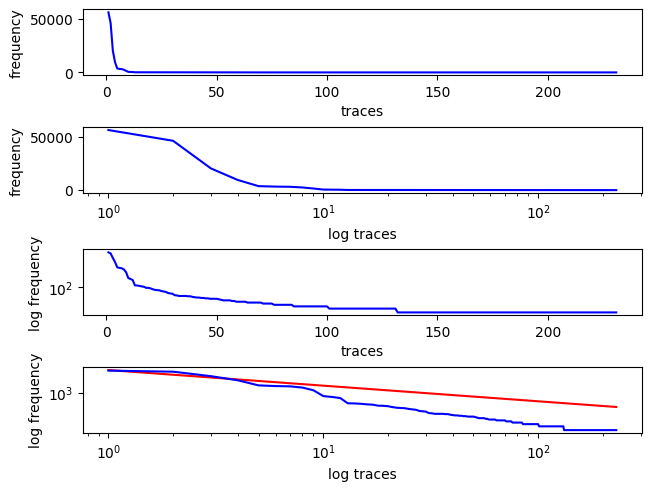

sepsis


parsing log, completed traces ::   0%|          | 0/1050 [00:00<?, ?it/s]

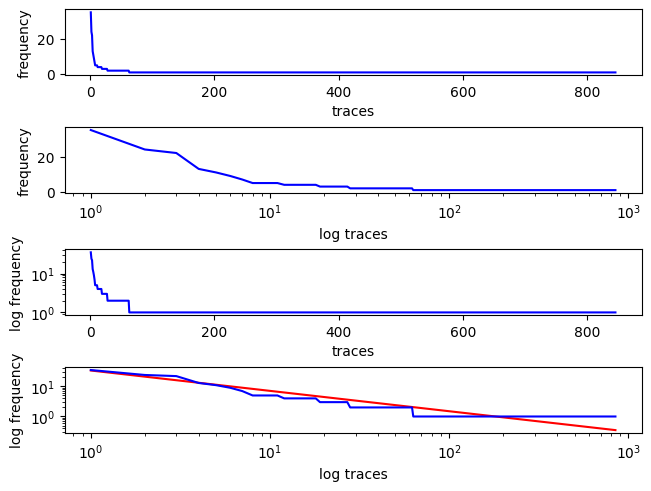

In [13]:
# %%capture

real_rmses = []
real_alphas = []
real_behavior_ratio = []
real_no_variants = []
real_causality = []
real_parallel = []

for folder in folders:
    print(folder)
    xes_file = [file for file in os.listdir(os.path.join(real_dir, folder)) if "xes" in file][0]
    log = pm4py.read_xes(os.path.join(real_dir, folder, xes_file))
    x, y, _ = get_frequency_data(log)
    if x.size < 2 and y.size < 2:
        continue

    real_no_variants.append(x.size)
    
    func = lambda x, C, a: C*x**(-a)
    popt, pcov = curve_fit(func, x, y, maxfev=5000)
    yhat = func(x, *popt)

    alpha = popt[1]
    real_alphas.append(alpha)

    rmse = np.sqrt(np.mean((yhat-y)**2))
    real_rmses.append(rmse)

    main_behavior, dev_behavior = behavior(log)
    real_behavior_ratio.append(len(main_behavior)/(len(dev_behavior)+len(main_behavior)))
    
    figure, axis = plt.subplots(4, constrained_layout=True)
    axis[0].plot(x, y, c="b")
    axis[0].set_ylabel("frequency")
    axis[0].set_xlabel("traces")

    axis[1].semilogx(x, y, c="b")
    axis[1].set_ylabel("frequency")
    axis[1].set_xlabel("log traces")

    axis[2].semilogy(x, y, c="b")
    axis[2].set_ylabel("log frequency")
    axis[2].set_xlabel("traces")

    axis[3].loglog(x, yhat, c="r")
    axis[3].loglog(x, y, c="b")
    axis[3].set_ylabel("log frequency")
    axis[3].set_xlabel("log traces")
    plt.show()

    alpha_relations = get_alpha_relations(log)
    causality = alpha_relations["causality"]
    parallel = alpha_relations["parallel"]

    traces = get_traces_as_lists(log)

    causality_count = 0
    parallel_count = 0

    for trace in traces:
        for i in range(len(trace)-1):
            x, y = trace[i], trace[i+1]
            causality_count += int((x,y) in causality)
            parallel_count += int((x,y) in parallel)

    causality_count /= len(traces)
    parallel_count /= len(traces)
    
    real_causality.append(causality_count)
    real_parallel.append(parallel_count)

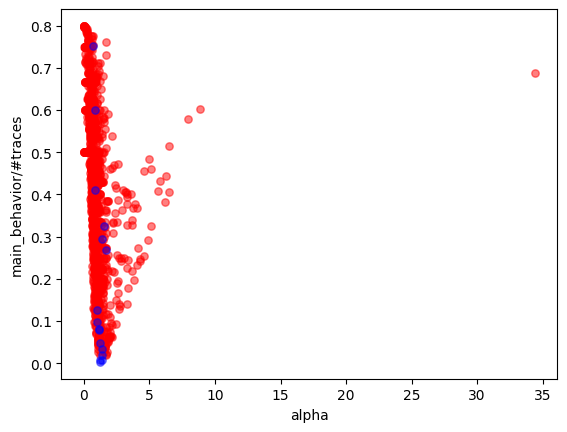

In [17]:
area = np.pi * 3**2
plt.scatter(np.array(synth_alphas), np.array(synth_behavior_ratio), s=area, color='r', alpha=0.5)
plt.scatter(np.array(real_alphas), np.array(real_behavior_ratio), s=area, color='b', alpha=0.5)
plt.ylabel("main_behavior/#traces")
plt.xlabel("alpha")
plt.show()

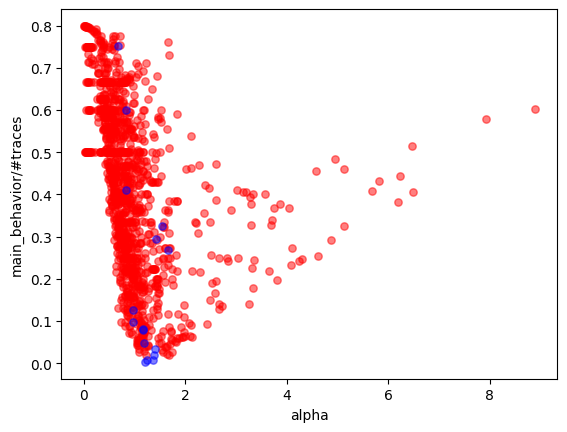

In [19]:
idx = synth_alphas.index(np.max(synth_alphas))
new_synth_alphas = synth_alphas[:idx]+synth_alphas[idx+1:]
new_synth_behavior_ratio = synth_behavior_ratio[:idx]+synth_behavior_ratio[idx+1:]

area = np.pi * 3**2
plt.scatter(np.array(new_synth_alphas), np.array(new_synth_behavior_ratio), s=area, color='r', alpha=0.5)
plt.scatter(np.array(real_alphas), np.array(real_behavior_ratio), s=area, color='b', alpha=0.5)
plt.ylabel("main_behavior/#traces")
plt.xlabel("alpha")
plt.show()

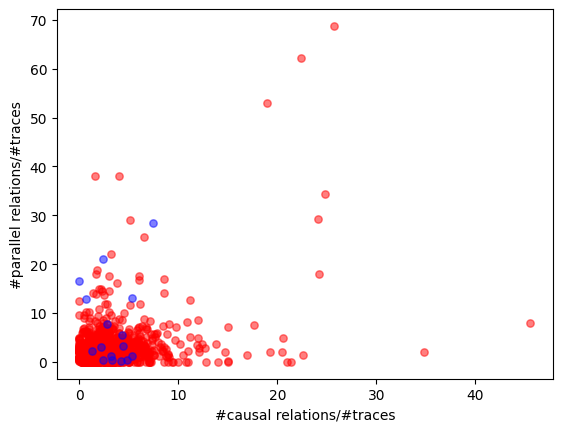

In [16]:
area = np.pi * 3**2
plt.scatter(np.array(synth_causality), np.array(synth_parallel), s=area, color='r', alpha=0.5)
plt.scatter(np.array(real_causality), np.array(real_parallel), s=area, color='b', alpha=0.5)
plt.ylabel("#parallel relations/#traces")
plt.xlabel("#causal relations/#traces")
plt.show()